#Logistic Regression Case Study on- Lead Scoring

##Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:



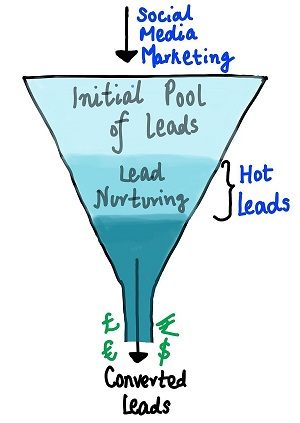

                           Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

##Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

##Goal
There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the NumPy and Pandas packages

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

##Importing the "Leads" Dataset

In [3]:
# Read the dataset
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Checking the Shape of dataset
leads.shape

(9240, 37)

In [5]:
# Inspecting the different columns in the dataset

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
# Checking the summary of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Checking the info to see the types of the feature variables and the null values present
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

###As it seems that there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

##Step 1: Data Cleaning and Preparation

In [8]:
# Checking the number of missing values in each column
leads.isnull().sum().sort_values(ascending=False)

,0
Lead Quality,4767
Asymmetrique Activity Index,4218
Asymmetrique Profile Score,4218
Asymmetrique Activity Score,4218
Asymmetrique Profile Index,4218
Tags,3353
Lead Profile,2709
What matters most to you in choosing a course,2709
What is your current occupation,2690
Country,2461


###As it is clearly seen there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [9]:
# Droping all the columns in which greater than
for c in leads.columns:
    if leads[c].isnull().sum()>3000:
        leads.drop(c, axis=1,inplace=True)

In [10]:
leads.isnull().sum().sort_values(ascending=False)

,0
What matters most to you in choosing a course,2709
Lead Profile,2709
What is your current occupation,2690
Country,2461
How did you hear about X Education,2207
Specialization,1438
City,1420
Page Views Per Visit,137
TotalVisits,137
Last Activity,103


In [11]:
#checking value counts of "City" column
leads['City'].value_counts(dropna=False)

,count
City,
Mumbai,3222
Select,2249
NaN,1420
Thane & Outskirts,752
Other Cities,686
Other Cities of Maharashtra,457
Other Metro Cities,380
Tier II Cities,74


###Mumbai has highest numbers of leads

###As you might be able to interpret, the variable City won't be of any use in our analysis. So it's best that we drop it.

In [12]:
# dropping the "City" feature
leads.drop(['City'], axis = 1, inplace = True)

In [13]:
#checking value counts of "Country" column
leads['Country'].value_counts(dropna=False)

,count
Country,
India,6492
NaN,2461
United States,69
United Arab Emirates,53
Singapore,24
Saudi Arabia,21
United Kingdom,15
Australia,13
Qatar,10


###Highest number of leads from INDIA

In [14]:
# dropping the "Country" feature
leads.drop(['Country'], axis = 1, inplace = True)

In [15]:
#Now checking the percentage of missing values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48


In [16]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

,0
What matters most to you in choosing a course,2709
Lead Profile,2709
What is your current occupation,2690
How did you hear about X Education,2207
Specialization,1438
TotalVisits,137
Page Views Per Visit,137
Last Activity,103
Lead Source,36
Get updates on DM Content,0


##Visualizing the features with Select values

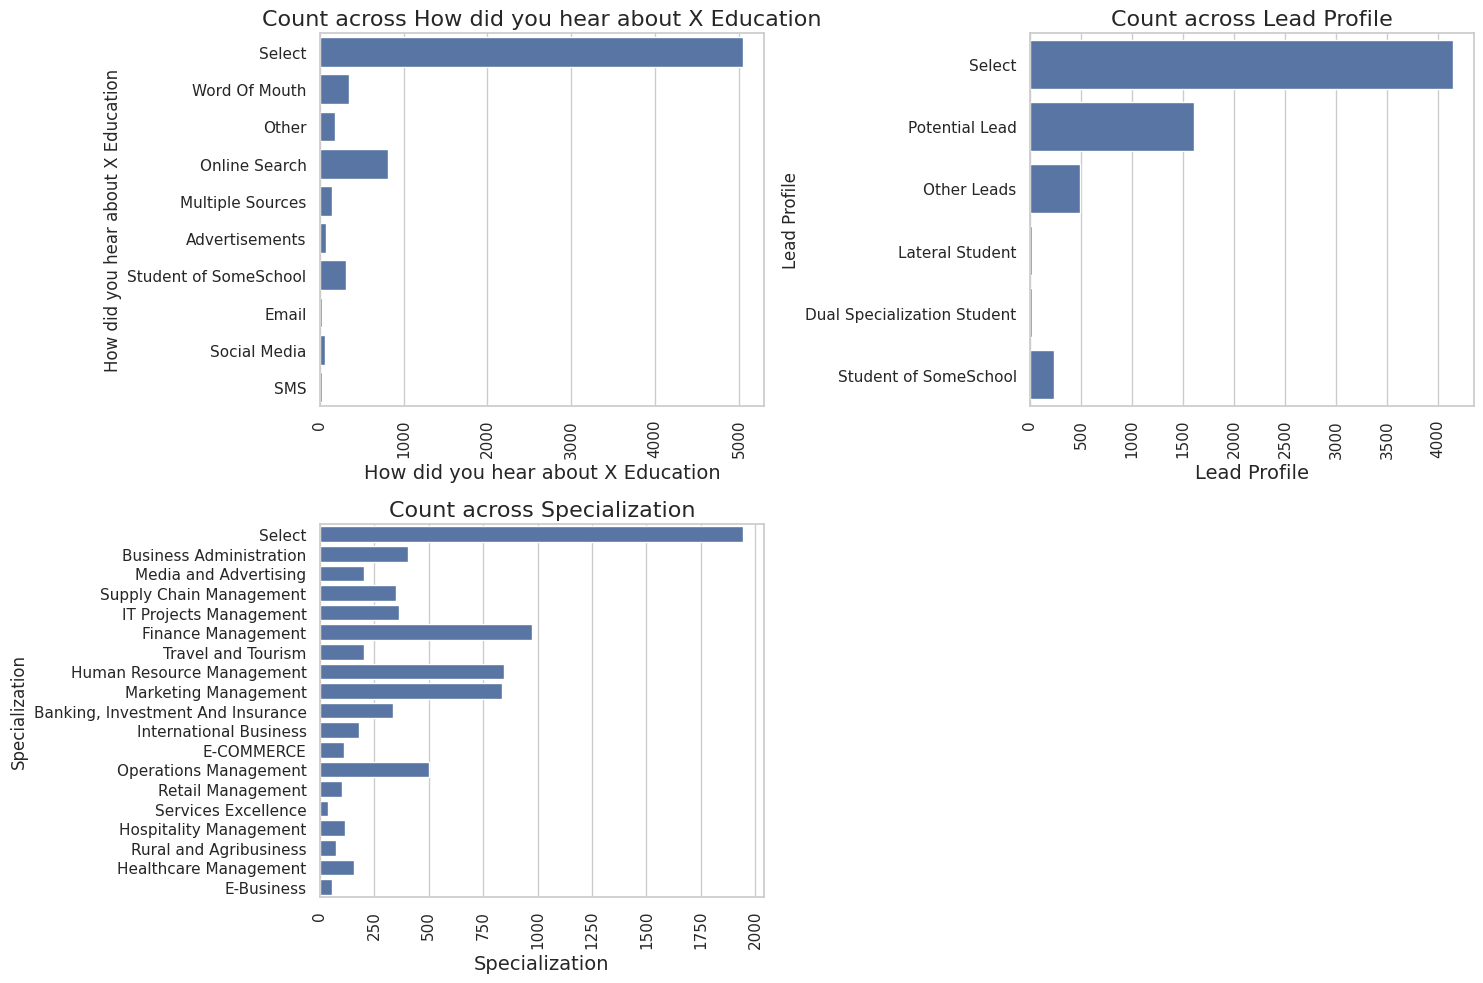

In [17]:
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(leads[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)



plt.tight_layout()

###There are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [18]:
# checking the value counts of all the columns

for c in leads:
    print(leads[c].astype('category').value_counts())
    print('___________________________________________________')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


###The following three columns now have the level 'Select'. Let's check them once again.

In [19]:
leads['Lead Profile'].astype('category').value_counts()

,count
Lead Profile,
Select,4146
Potential Lead,1613
Other Leads,487
Student of SomeSchool,241
Lateral Student,24
Dual Specialization Student,20


In [20]:

leads['How did you hear about X Education'].value_counts()

,count
How did you hear about X Education,
Select,5043
Online Search,808
Word Of Mouth,348
Student of SomeSchool,310
Other,186
Multiple Sources,152
Advertisements,70
Social Media,67
Email,26


In [21]:
leads['Specialization'].value_counts()

,count
Specialization,
Select,1942
Finance Management,976
Human Resource Management,848
Marketing Management,838
Operations Management,503
Business Administration,403
IT Projects Management,366
Supply Chain Management,349
"Banking, Investment And Insurance",338


##Visualizing the features

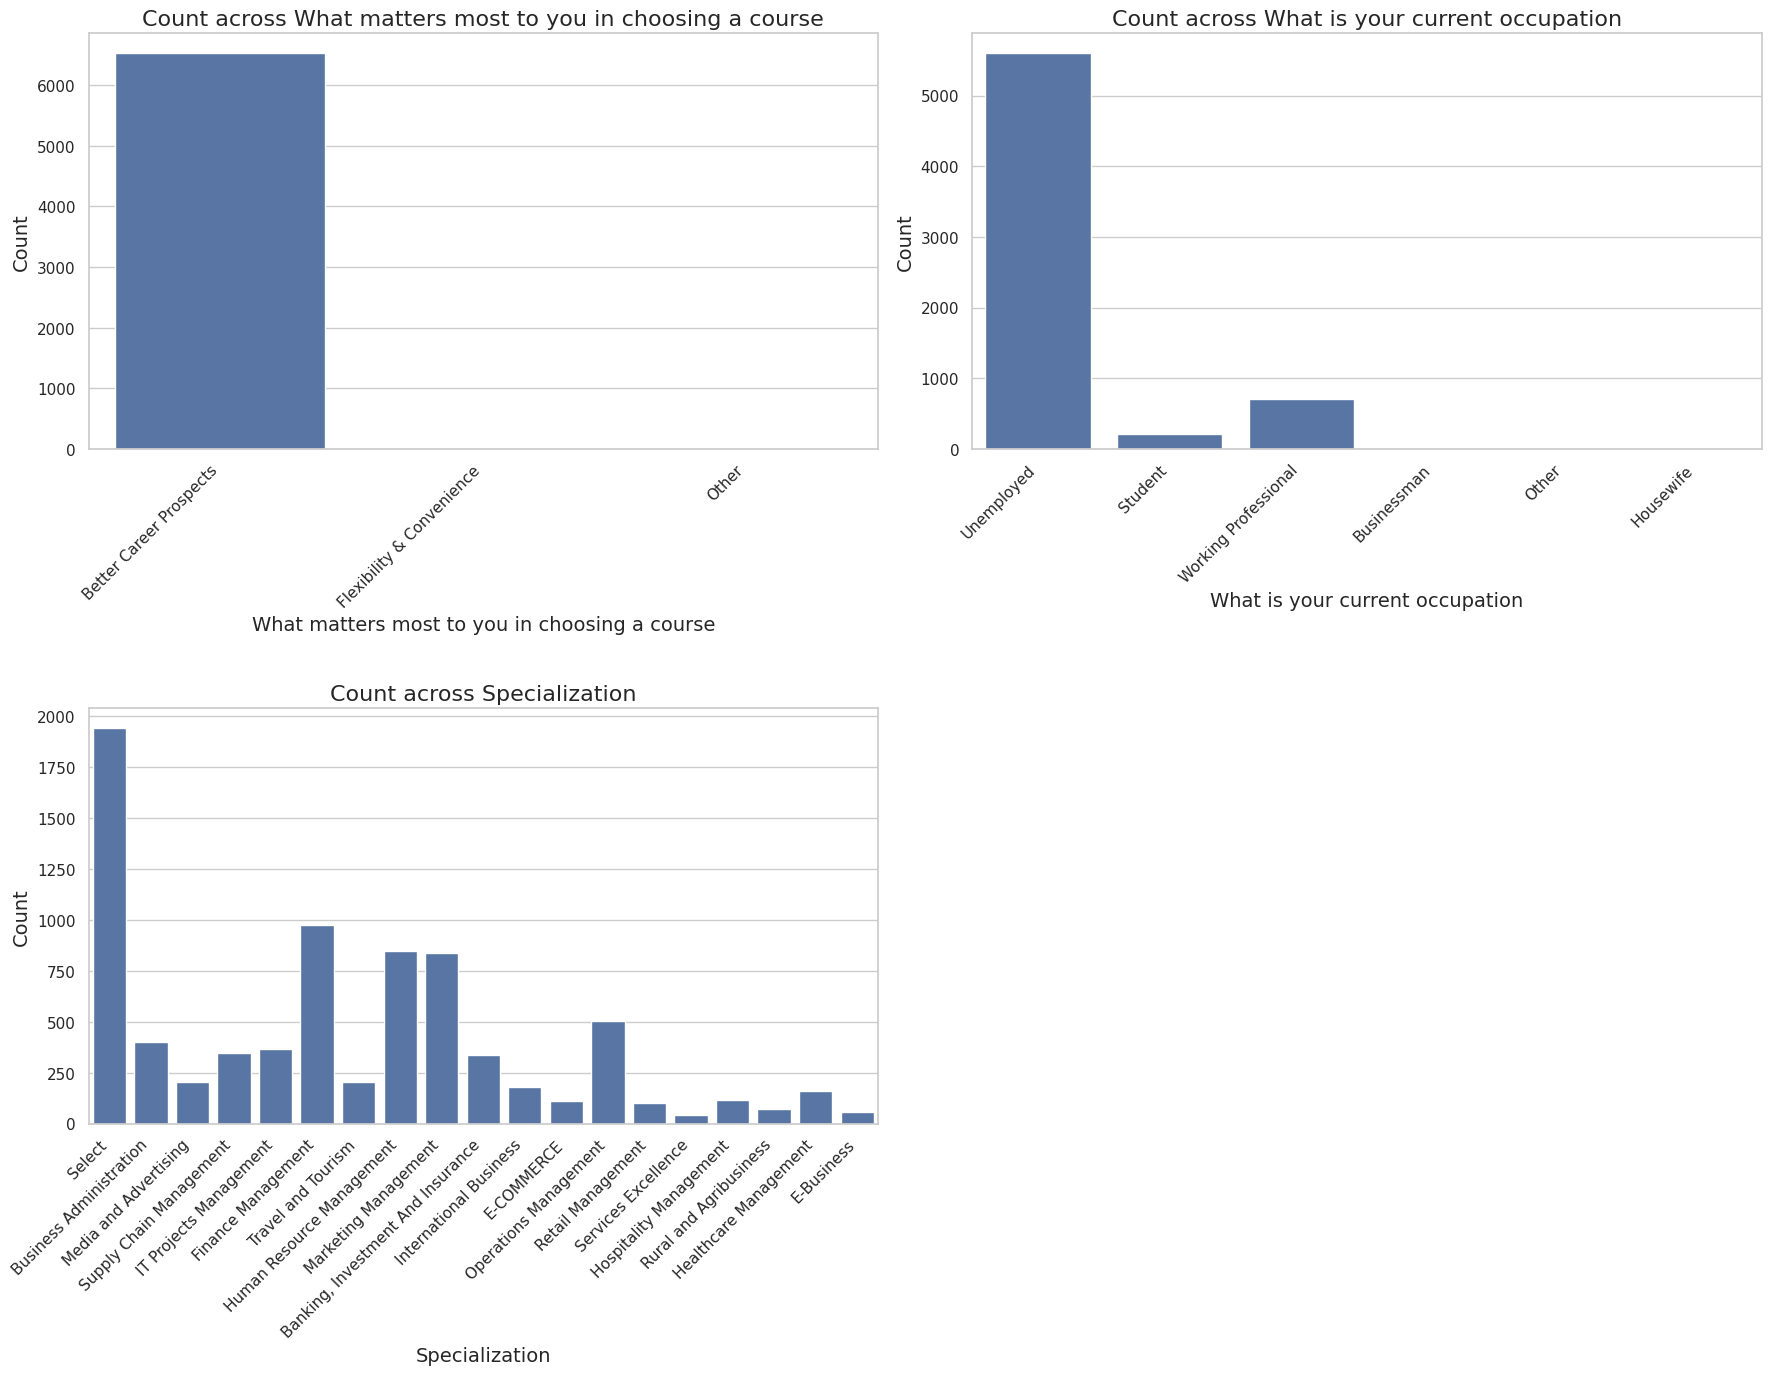

In [23]:
def countplot(x, fig):
    plt.subplot(4, 2, fig)
    sns.countplot(data=leads, x=x)
    plt.title('Count across ' + x, size=16)
    plt.xlabel(x, size=14)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count', size=14)

plt.figure(figsize=(18, 25))

countplot('What matters most to you in choosing a course', 1)
countplot('What is your current occupation', 2)
countplot('Specialization', 3)

plt.tight_layout()
plt.show()

###As it can be seen that the levels of "Lead Profile" and "How did you hear about X Education" have a lot of rows which have the value Select which is of no use to the analysis

###So it's best that we drop them.

In [24]:
# dropping Lead Profile and How did you hear about X Education cols
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

###Also we notice that, when we got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

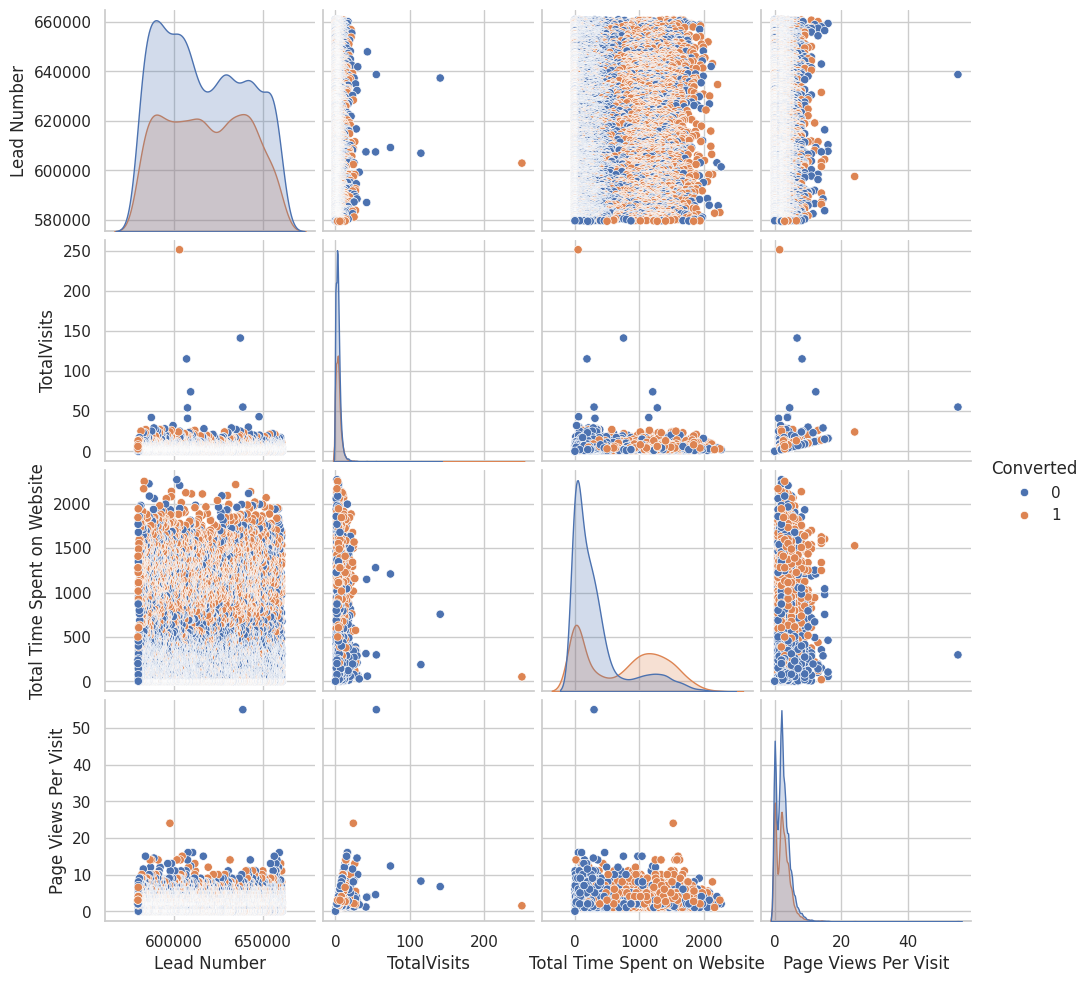

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(leads,diag_kind='kde',hue='Converted')
plt.show()

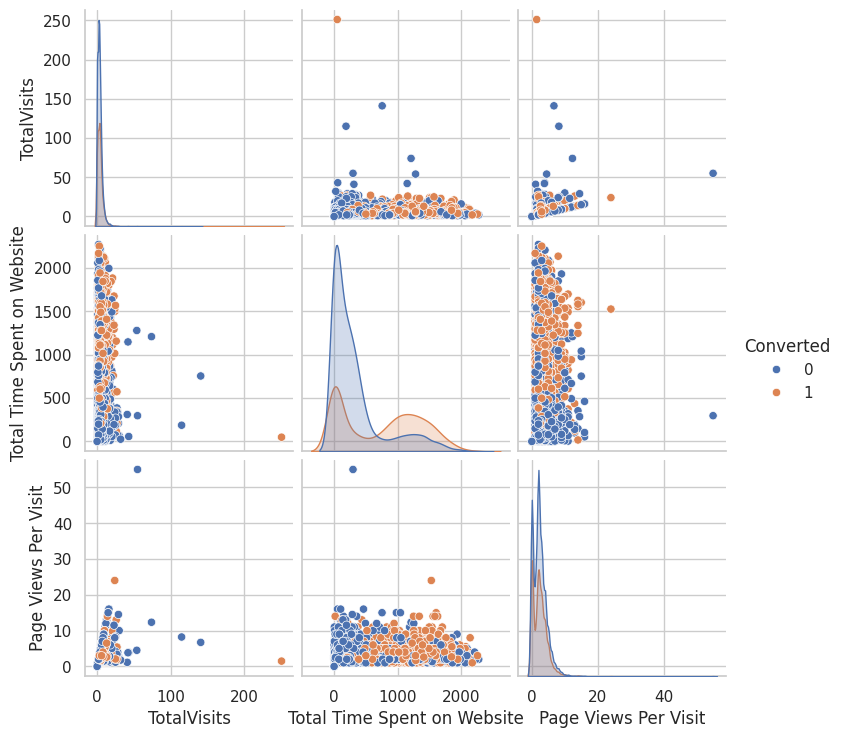

In [28]:
x_edu = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x_edu,diag_kind='kde',hue='Converted')
plt.show()

In [29]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedx_edu = pd.DataFrame(pt.fit_transform(x_edu))
transformedx_edu.columns = x_edu.columns
transformedx_edu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.457907,-1.473767,-1.454706,-0.791863
1,0.747918,0.729628,0.308534,-0.791863
2,-0.141636,1.306093,0.065574,1.262845
3,-0.640428,0.264936,-0.536967,-0.791863
4,-0.141636,1.252499,-0.536967,1.262845


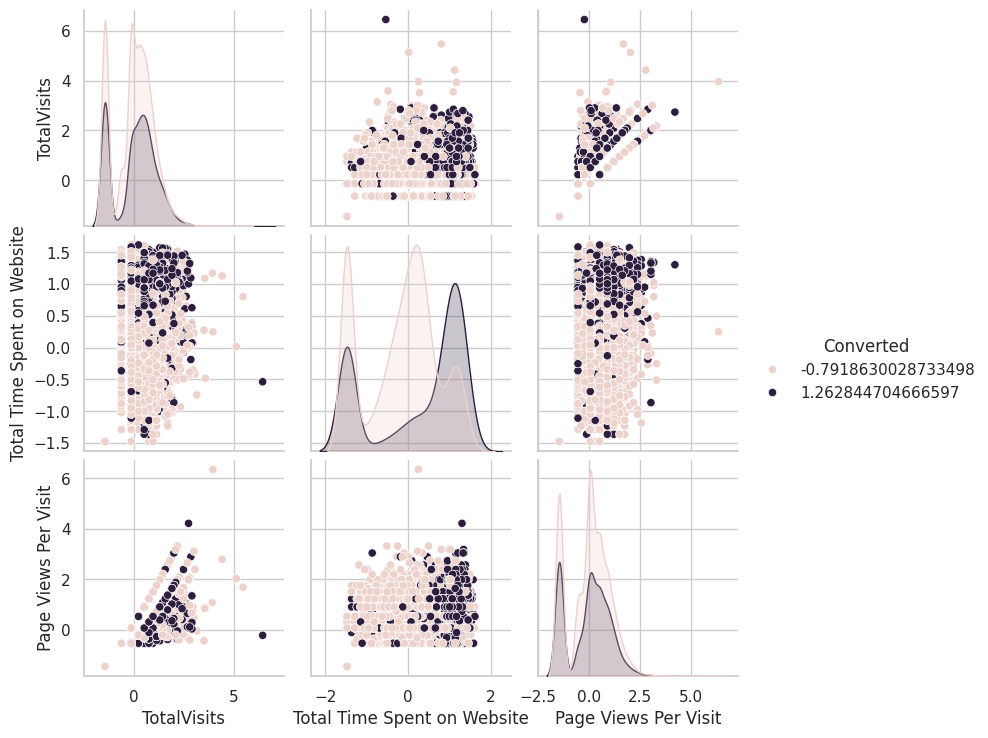

In [30]:
sns.pairplot(transformedx_edu,diag_kind='kde',hue='Converted')
plt.show()

In [31]:
# Dropping the above columns
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [32]:
leads['What matters most to you in choosing a course'].value_counts()

,count
What matters most to you in choosing a course,
Better Career Prospects,6528
Flexibility & Convenience,2
Other,1


###The variable What matters most to you in choosing a course has the level Better Career Prospects 6528 times while the other two levels appear once twice and once respectively.

###So we should dropping this column as well.

In [33]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [34]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

,0
What is your current occupation,2690
Specialization,1438
TotalVisits,137
Page Views Per Visit,137
Last Activity,103
Lead Source,36
Prospect ID,0
Lead Number,0
Lead Origin,0
Do Not Email,0


###Now, there's the column What is your current occupation which has a lot of null values. Now you can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column What is you current occupation.

In [35]:
# Dropping the null values rows in the column 'What is your current occupation'

leads = leads[~pd.isnull(leads['What is your current occupation'])]

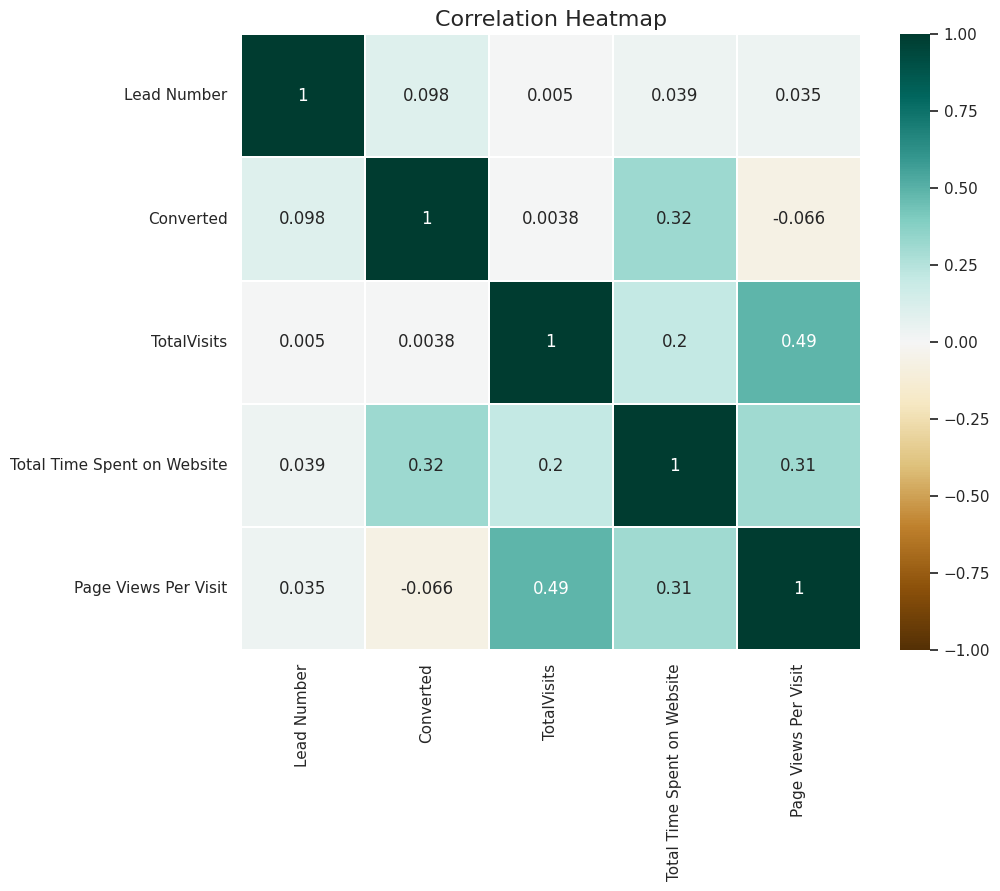

In [37]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Select only numeric columns for correlation
numeric_leads = leads.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_leads.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="BrBG", robust=True, linewidths=0.1, vmin=-1, vmax=1)

# Show the plot
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

##Analysing Categorical features

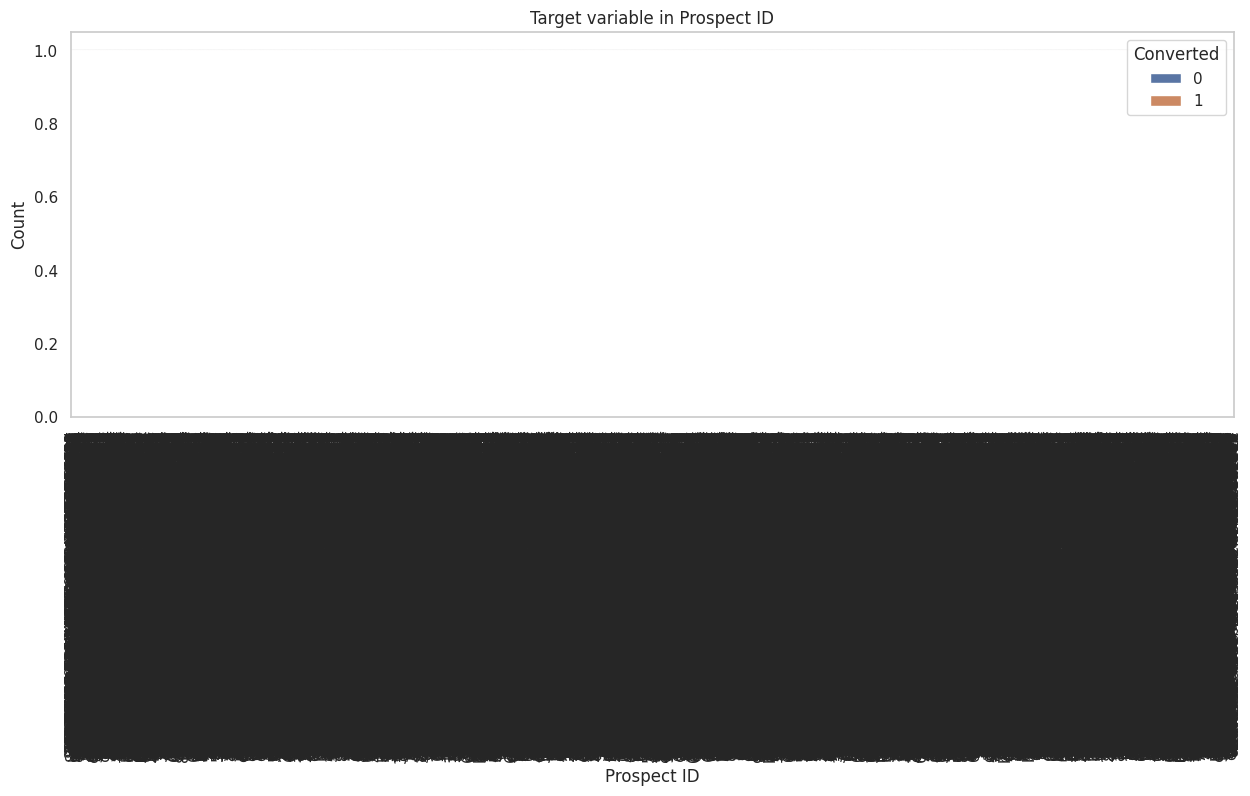

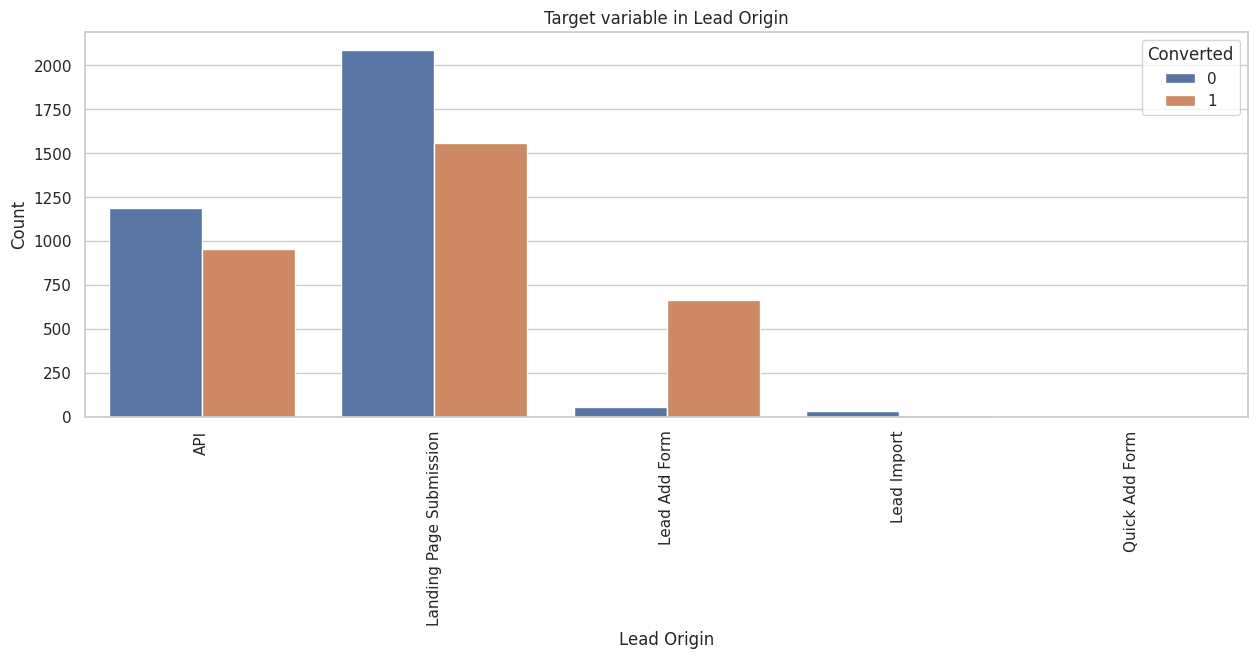

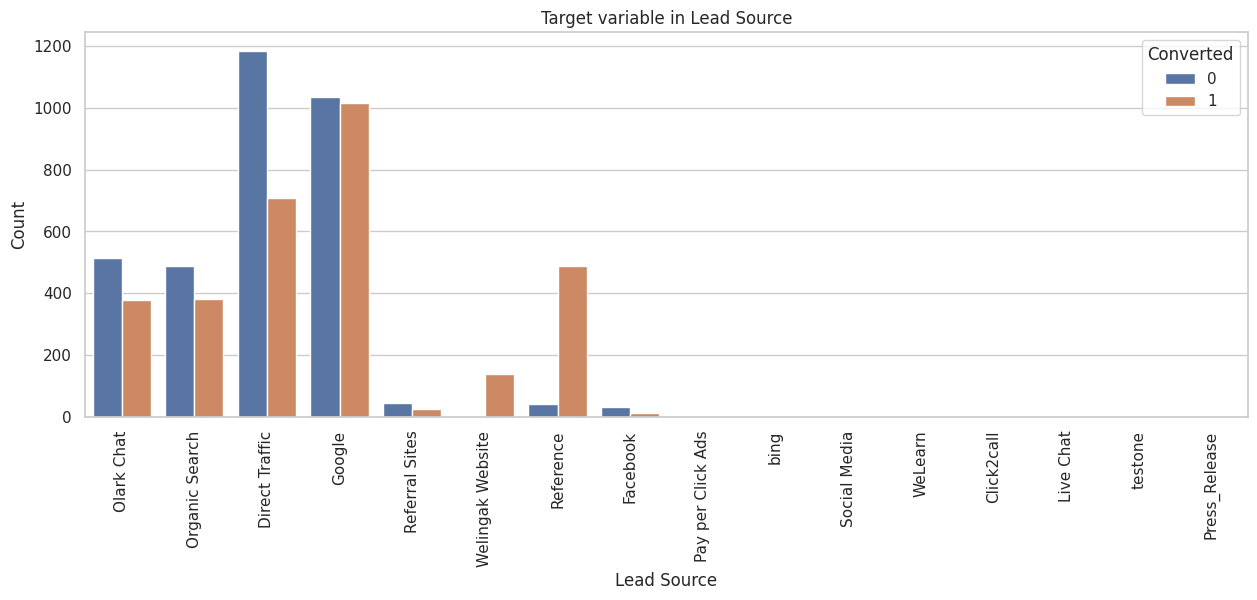

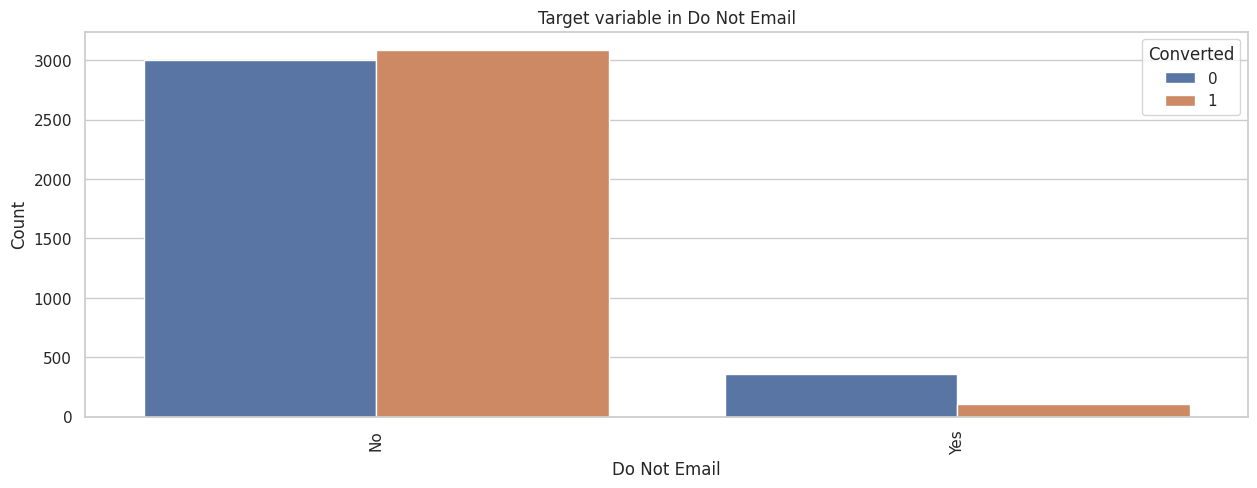

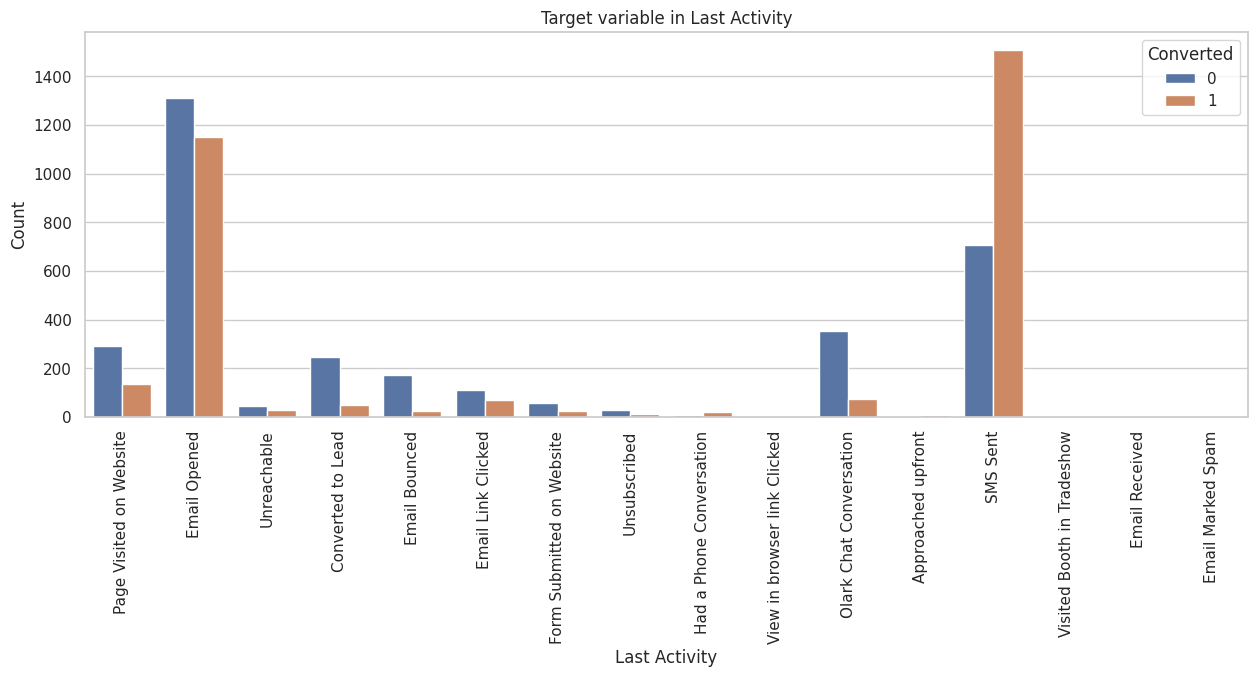

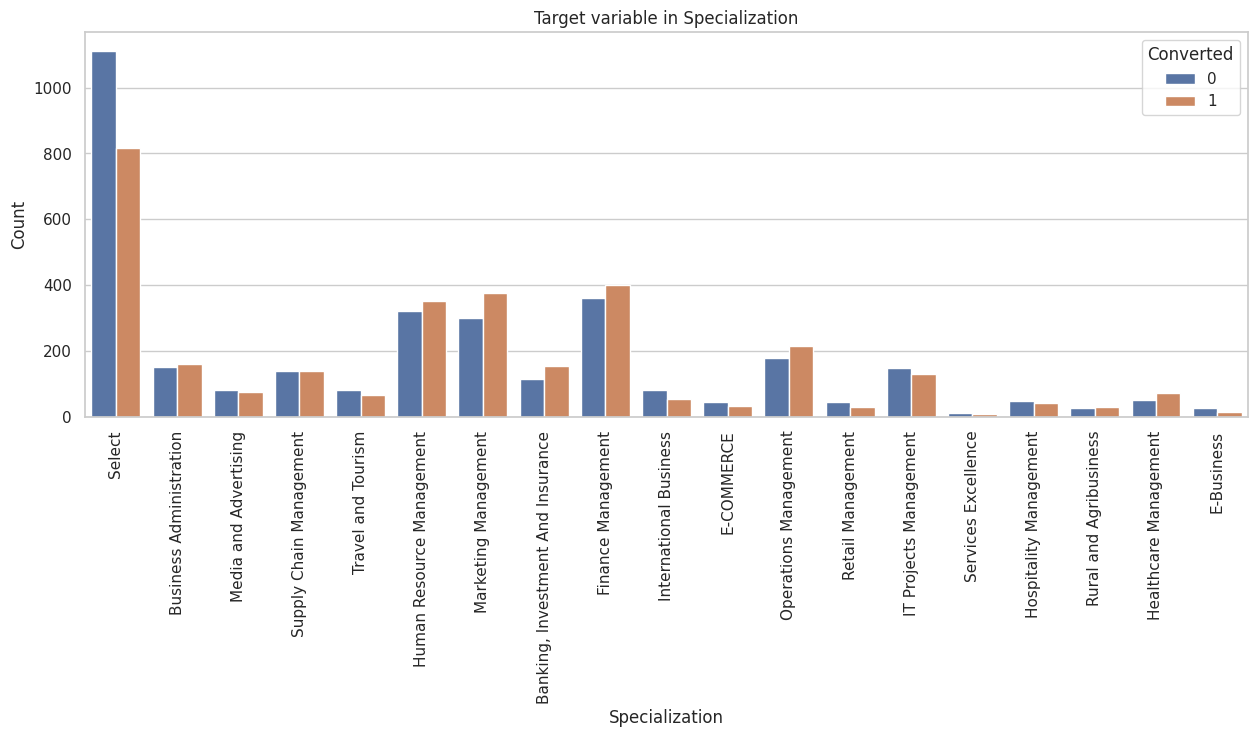

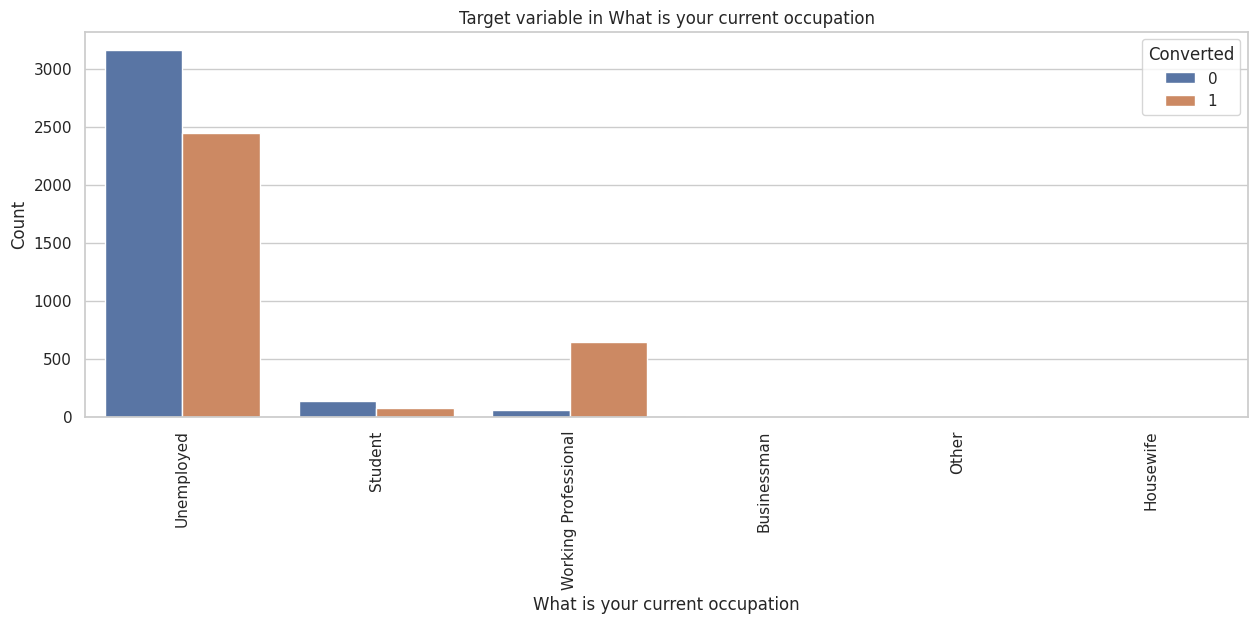

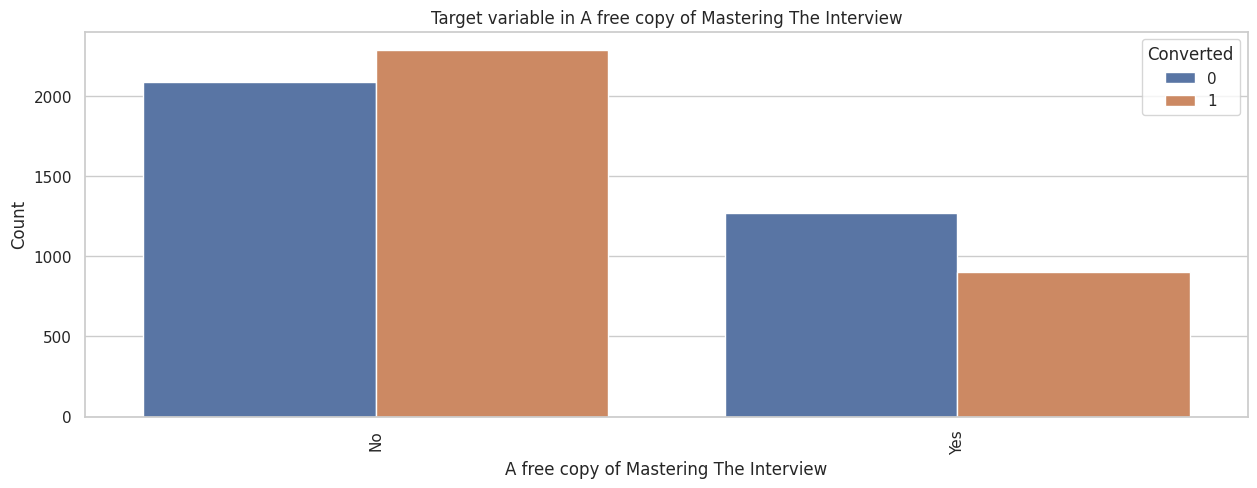

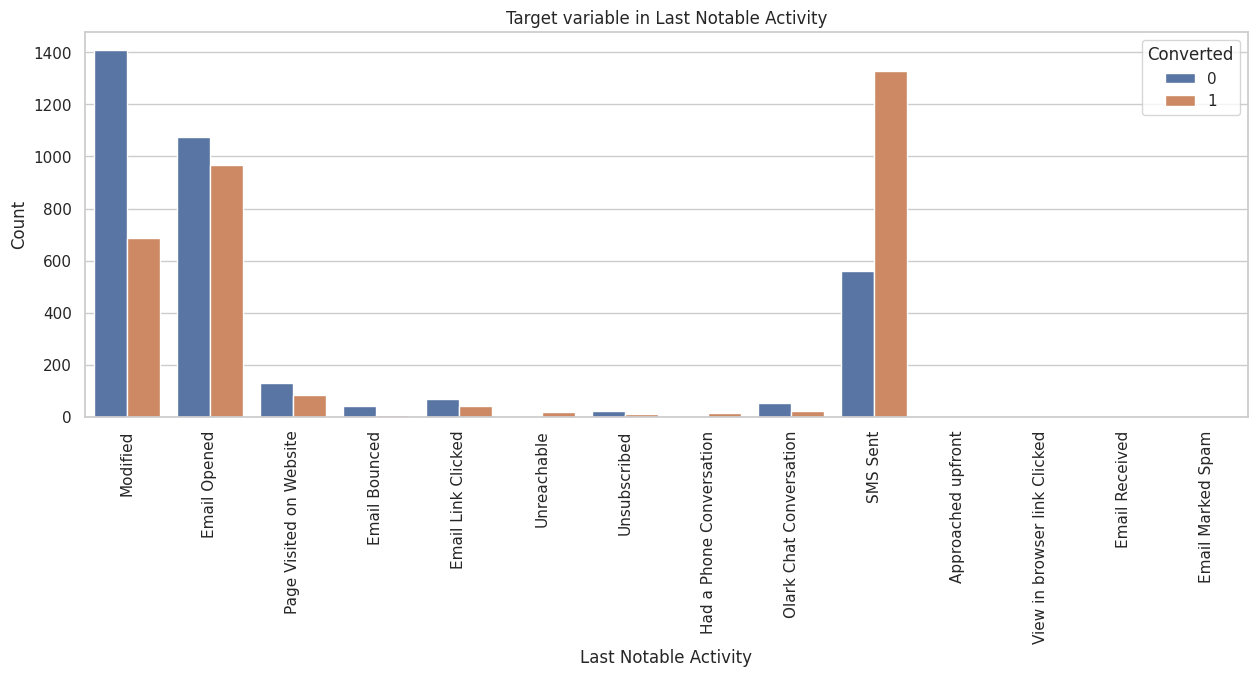

In [39]:
# Get the categorical columns
conv = leads.select_dtypes(include="object").columns

# Loop through each categorical column
for i in conv:
    plt.figure(figsize=(15, 5))

    # Create the countplot
    sns.countplot(data=leads, x=i, hue='Converted')  # Specify the DataFrame and column names
    plt.xticks(rotation=90)
    plt.title('Target variable in ' + i)
    plt.xlabel(i)
    plt.ylabel('Count')  # Add a y-label for clarity
    plt.legend(title='Converted')  # Add a legend title for clarity
    plt.show()

In [40]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

,0
TotalVisits,130
Page Views Per Visit,130
Last Activity,103
Lead Source,36
Specialization,18
Prospect ID,0
Lead Number,0
Lead Origin,0
Do Not Email,0
Converted,0


###Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [41]:
# Dropping the null values rows in the column 'TotalVisits'

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [42]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

,0
Lead Source,29
Specialization,18
Prospect ID,0
Lead Number,0
Lead Origin,0
Do Not Email,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0


In [43]:
# Dropping the null values rows in the column 'Lead Source'

leads = leads[~pd.isnull(leads['Lead Source'])]

In [45]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

,0
Specialization,18
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0


In [47]:
# Drop the null values rows in the column 'Specialization'

leads = leads[~pd.isnull(leads['Specialization'])]

In [49]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0
Last Activity,0


###Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained

In [50]:
print(len(leads.index))
print(len(leads.index)/9240)

6373
0.6897186147186147


###We still have around 69% of the rows which seems good enough.

In [51]:
# Let's look at the dataset again

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


###Now, clearly the variables Prospect ID and Lead Number won't be of any use in the analysis, so it's best that we drop these two variables.

In [53]:
# Dropping the "Prospect ID" and "Lead Number"
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [54]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


##Dummy variable creation

###The next step is to dealing with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [55]:
# Checking the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [56]:
# Demo Cell
df = pd.DataFrame({'P': ['p', 'q', 'p']})
df

,P
0,p
1,q
2,p


In [57]:
pd.get_dummies(df)

,P_p,P_q
0,True,False
1,False,True
2,True,False


In [59]:
pd.get_dummies(df, prefix=['col1'])

,col1_p,col1_q
0,True,False
1,False,True
2,True,False


In [60]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview',
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [62]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select'
# which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [64]:
# Dropping the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [65]:
# Let's take a look at the dataset again

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,Tru

##Test-Train Split

###The next step is to spliting the dataset into training an testing sets.

In [67]:
# Put all the feature variables in X

X = leads.drop(['Converted'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,Fals

In [68]:
y = leads['Converted']

y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [69]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [70]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4461, 74)
y_train Size (4461,)


##Scaling

###Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [71]:
# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
218,0.015936,0.082306,0.250,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4171,0.023904,0.034331,0.375,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4037,0.000000,0.000000,0.000,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Fa

##Looking at the correlations

###Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

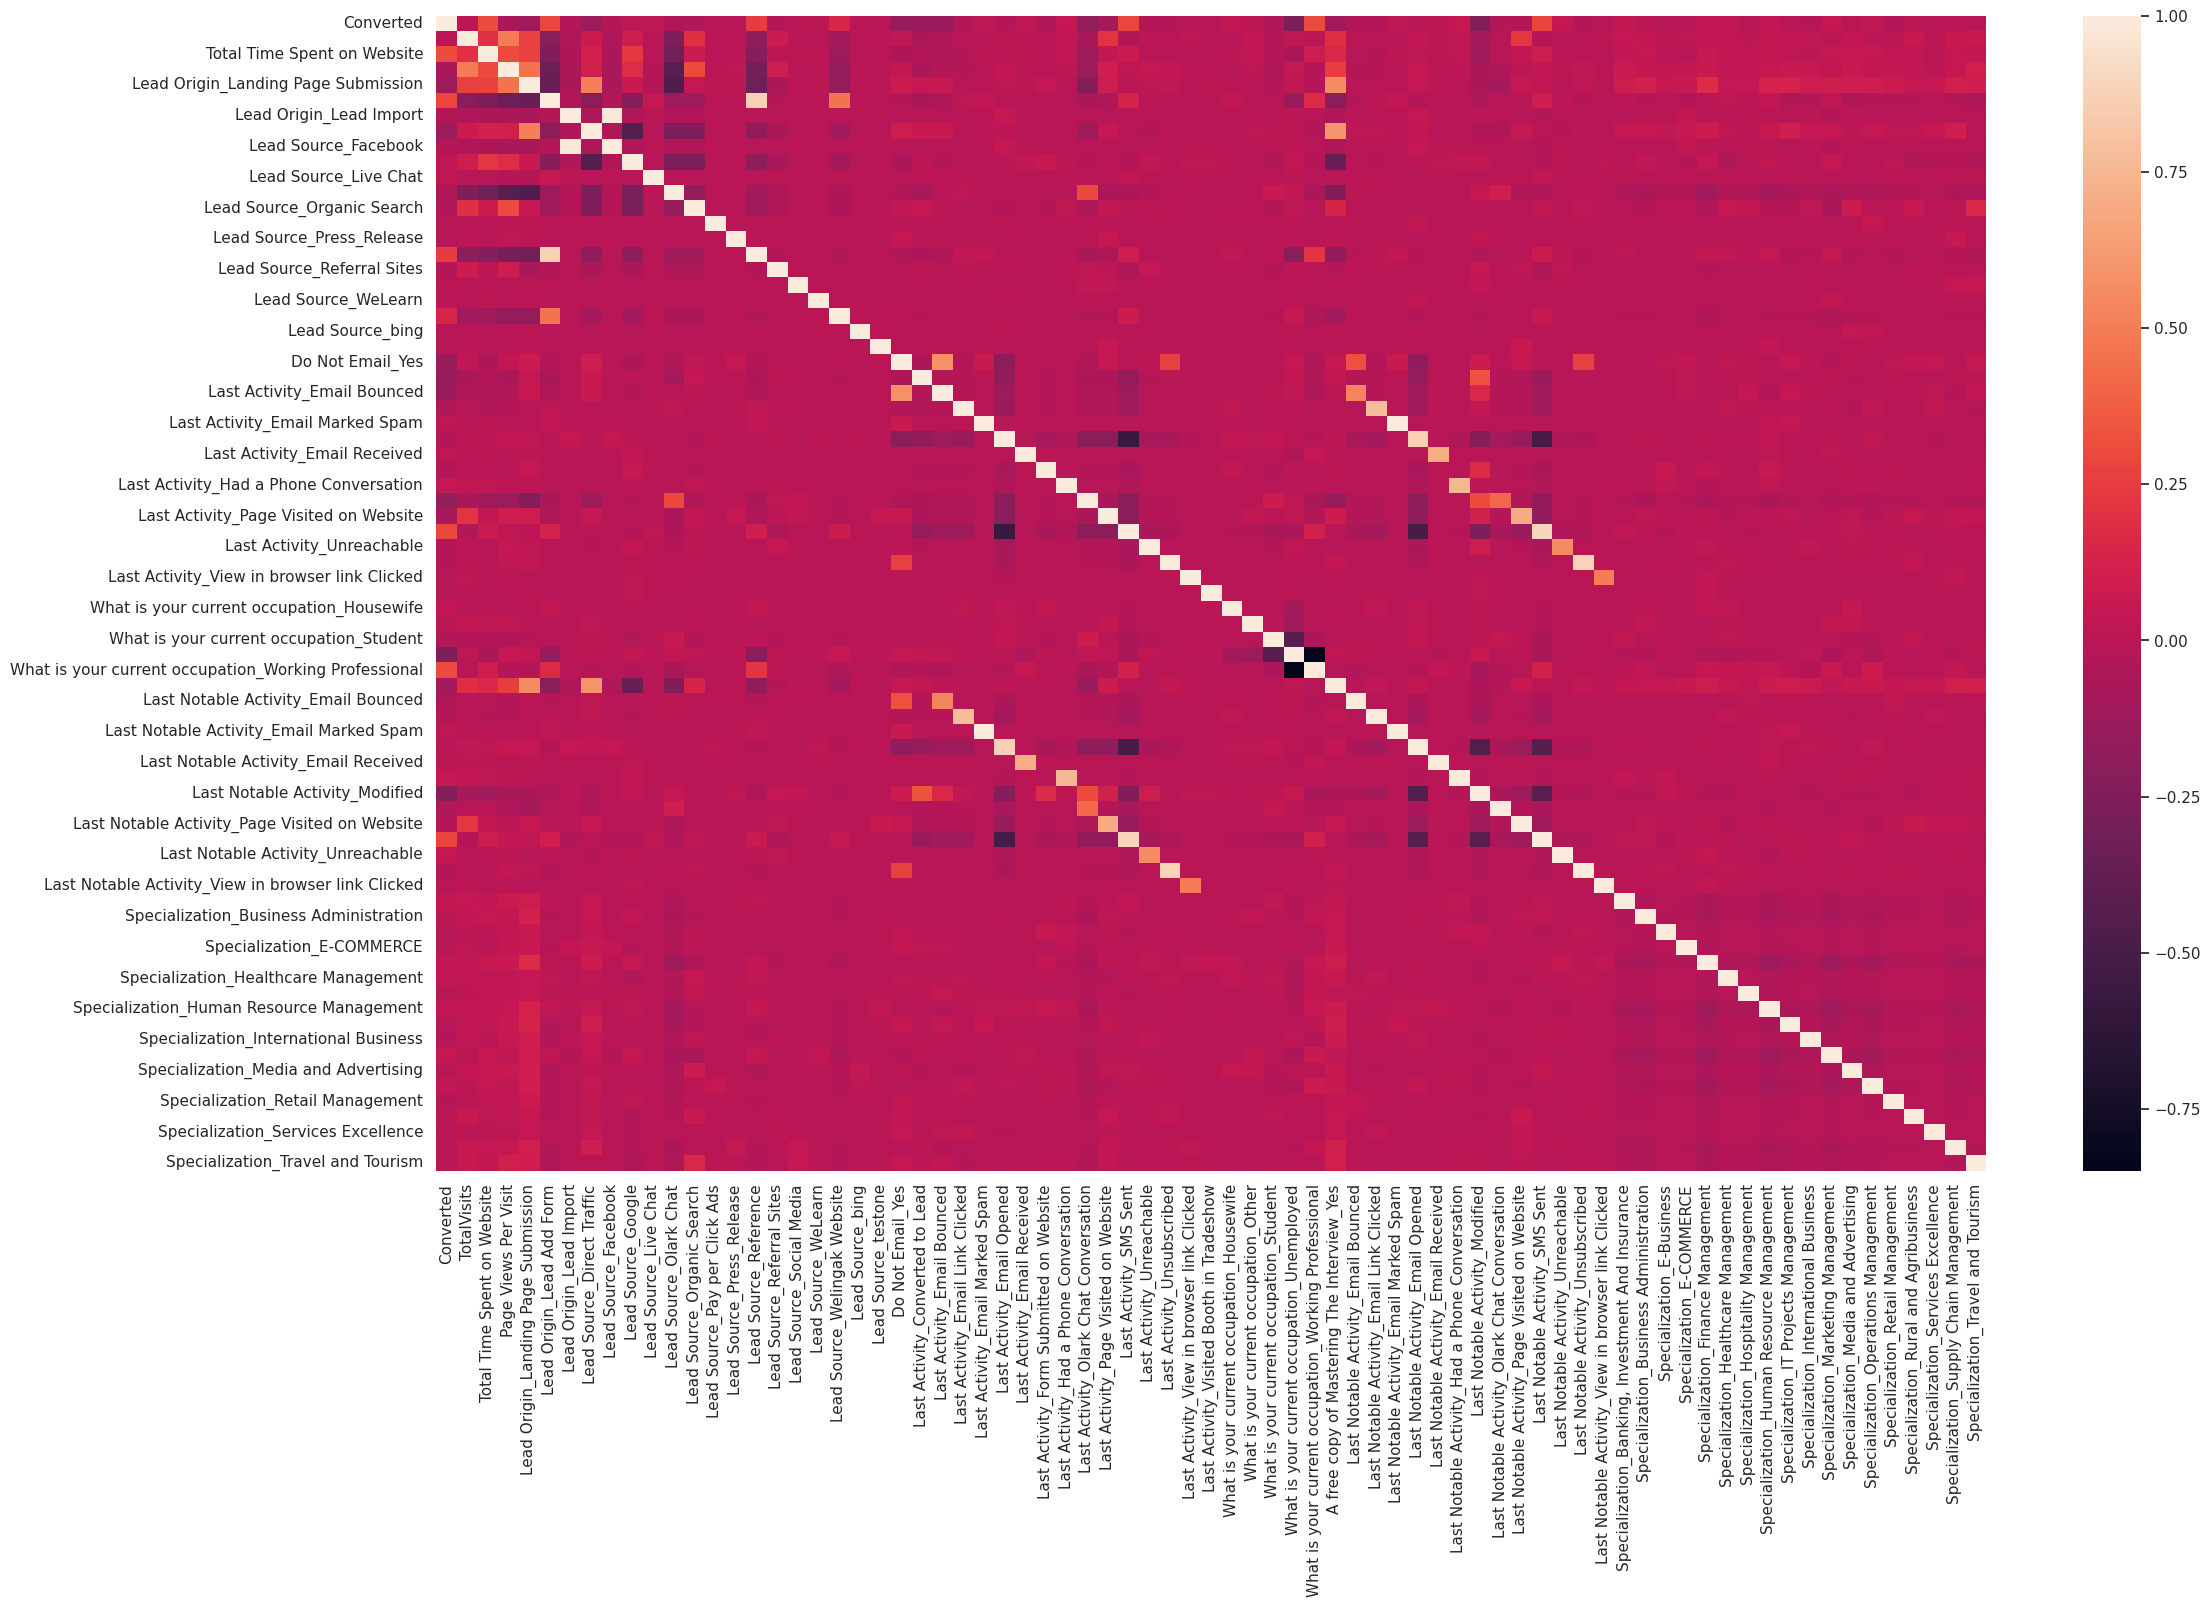

In [72]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(leads.corr())
plt.show()

##Step 2: Model Building

###Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [74]:
# Importing the 'LogisticRegression' and creating a LogisticRegression object
logreg = LogisticRegression()

In [76]:
# Importing the 'RFE' and selecting 15 variables
rfe = RFE(estimator=logreg, n_features_to_select=15)  # Use keyword arguments
rfe = rfe.fit(X_train, y_train)

In [77]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 54),
 ('Lead Source_Direct Traffic', False, 23),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 44),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 34),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 21),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [79]:
# Putting all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

###Now we have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [81]:
# Select only the columns selected by RFE

X_train = X_train[col]

##Model 1

In [85]:
# Ensure y_train is numeric (0s and 1s)
y_train = y_train.astype(int)  # Convert to integer if it's not already

# If X_train contains categorical variables, convert them to numeric
X_train = pd.get_dummies(X_train, drop_first=True)  # One-hot encoding for categorical variables

# Add a constant to the model
X_train_sm = sm.add_constant(X_train)

# Convert boolean columns to integers
X_train_sm = X_train_sm.astype(int)

# Fit the logistic regression model
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()

# Output the summary
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2439.8
Date:                Fri, 17 Jan 2025   Deviance:                       4879.6
Time:                        08:37:36   Pearson chi2:                 4.86e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.2526
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

###There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

##Checking VIF

In [87]:
# Convert boolean columns to integers
X_train = X_train.astype(int)

# Create a VIF DataFrame
vif = pd.DataFrame()
vif['Features'] = X_train.columns

# Calculate VIF for each feature
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Round the VIF values
vif['VIF'] = round(vif['VIF'], 2)

# Sort the VIF DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF DataFrame
print(vif)

                                                Features    VIF
2                              Lead Origin_Lead Add Form  84.13
4                                  Lead Source_Reference  65.13
5                           Lead Source_Welingak Website  20.01
7                 Last Activity_Had a Phone Conversation   2.44
13        Last Notable Activity_Had a Phone Conversation   2.43
11            What is your current occupation_Unemployed   1.74
8                                 Last Activity_SMS Sent   1.58
12  What is your current occupation_Working Professional   1.22
3                                 Lead Source_Olark Chat   1.19
6                                       Do Not Email_Yes   1.08
10               What is your current occupation_Student   1.02
14                     Last Notable Activity_Unreachable   1.01
0                                            TotalVisits   1.00
1                            Total Time Spent on Website   1.00
9              What is your current occu

###VIFs seem to be in a decent range except for three variables.

###Let's first drop the variable Lead Source_Reference since it has a high p-value as well as a high VIF.

In [88]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

##Model 2

In [89]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2440.1
Date:                Fri, 17 Jan 2025   Deviance:                       4880.2
Time:                        08:40:32   Pearson chi2:                 4.83e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.2525
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8203      0.555      1.478      0.139      -0.267       1.908
TotalVisits                                             24.3717   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Total Time Spent on Website                            -23.9637   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Lead Add Form                                2.7756      0.246     11.301      0.000       2.294       3.257
Lead Source_Olark Chat                                   0.0831      0.096      0.870      0.385      -0.104       0.270
Lead Source_Welingak Website                             2.1131      1.036      2.039      0.041       0.082       4.144
Do Not Email_Yes                                        -1.5322      0.175     -8.764      0.000      -1.875      -1.190
Last Activity_Had a Phone Conversation                   1.2780      0.892      1.432      0.152      -0.471       3.027
Last Activity_SMS Sent                                   1.2033      0.074     16.241      0.000       1.058       1.348
What is your current occupation_Housewife               22.3217    2.6e+04      0.001      0.999   -5.09e+04    5.09e+04
What is your current occupation_Student                 -1.4365      0.587     -2.446      0.014      -2.588      -0.285
What is your current occupation_Unemployed              -1.6259      0.557     -2.921      0.003      -2.717      -0.535
What is your current occupation_Working Professional     1.0824      0.585      1.850      0.064      -0.064       2.229
Last Notable Activity_Had a Phone Conversation          22.9070   2.41e+04      0.001      0.999   -4.73e+04    4.73e+04
Last Notable Activity_Unreachable                        2.3606      0.776      3.043      0.002       0.840       3.881
========================================================================================================================
"""

##Checking VIF

In [90]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
10,What is your current occupation_Unemployed,1.74
7,Last Activity_SMS Sent,1.58
2,Lead Origin_Lead Add Form,1.50
4,Lead Source_Welingak Website,1.33
11,What is your current occupation_Working Professional,1.22
3,Lead Source_Olark Chat,1.19
5,Do Not Email_Yes,1.08
9,What is your current occupation_Student,1.02


###The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with Last Notable Activity_Had a Phone Conversation.

In [91]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

##Model 3

In [92]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2442.4
Date:                Fri, 17 Jan 2025   Deviance:                       4884.8
Time:                        08:41:55   Pearson chi2:                 4.84e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2517
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8202      0.555      1.478      0.139      -0.268       1.908
TotalVisits                                             23.3718   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Total Time Spent on Website                            -22.9636   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Add Form                                2.7758      0.246     11.302      0.000       2.294       3.257
Lead Source_Olark Chat                                   0.0843      0.096      0.882      0.378      -0.103       0.272
Lead Source_Welingak Website                             2.1131      1.036      2.039      0.041       0.082       4.144
Do Not Email_Yes                                        -1.5320      0.175     -8.764      0.000      -1.875      -1.189
Last Activity_Had a Phone Conversation                   2.6108      0.763      3.421      0.001       1.115       4.107
Last Activity_SMS Sent                                   1.2033      0.074     16.242      0.000       1.058       1.348
What is your current occupation_Housewife               21.3216   1.58e+04      0.001      0.999   -3.09e+04    3.09e+04
What is your current occupation_Student                 -1.4368      0.587     -2.446      0.014      -2.588      -0.285
What is your current occupation_Unemployed              -1.6259      0.557     -2.921      0.003      -2.717      -0.535
What is your current occupation_Working Professional     1.0808      0.585      1.847      0.065      -0.066       2.227
Last Notable Activity_Unreachable                        2.3607      0.776      3.043      0.002       0.840       3.881
========================================================================================================================
"""

###Dropping the What is your current occupation_Housewife as having high P value

In [93]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

##Model 4

In [94]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2444.2
Date:                Fri, 17 Jan 2025   Deviance:                       4888.5
Time:                        08:42:45   Pearson chi2:                 4.85e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2511
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2739      0.518      2.459      0.014       0.259       2.289
TotalVisits                                             21.3716   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Total Time Spent on Website                            -20.9639   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Add Form                                2.7772      0.246     11.310      0.000       2.296       3.259
Lead Source_Olark Chat                                   0.0835      0.096      0.874      0.382      -0.104       0.271
Lead Source_Welingak Website                             2.1118      1.036      2.038      0.042       0.081       4.143
Do Not Email_Yes                                        -1.5354      0.175     -8.779      0.000      -1.878      -1.193
Last Activity_Had a Phone Conversation                   2.6106      0.763      3.421      0.001       1.115       4.106
Last Activity_SMS Sent                                   1.2033      0.074     16.241      0.000       1.058       1.349
What is your current occupation_Student                 -1.8903      0.553     -3.420      0.001      -2.973      -0.807
What is your current occupation_Unemployed              -2.0795      0.520     -4.000      0.000      -3.098      -1.061
What is your current occupation_Working Professional     0.6274      0.550      1.140      0.254      -0.451       1.706
Last Notable Activity_Unreachable                        2.3519      0.777      3.028      0.002       0.830       3.874
========================================================================================================================
"""

###Dropping the What is your current occupation_Working Professional as having high P value

In [95]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

##Model 4

In [96]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2444.8
Date:                Fri, 17 Jan 2025   Deviance:                       4889.7
Time:                        08:46:50   Pearson chi2:                 4.81e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2509
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.8404      0.175     10.506      0.000       1.497       2.184
TotalVisits                                   21.3727   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Total Time Spent on Website                  -20.9653   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Add Form                      2.7784      0.246     11.315      0.000       2.297       3.260
Lead Source_Olark Chat                         0.0846      0.096      0.885      0.376      -0.103       0.272
Lead Source_Welingak Website                   2.1106      1.036      2.037      0.042       0.080       4.141
Do Not Email_Yes                              -1.5348      0.175     -8.783      0.000      -1.877      -1.192
Last Activity_Had a Phone Conversation         2.6128      0.763      3.424      0.001       1.117       4.108
Last Activity_SMS Sent                         1.2058      0.074     16.292      0.000       1.061       1.351
What is your current occupation_Student       -2.4576      0.259     -9.493      0.000      -2.965      -1.950
What is your current occupation_Unemployed    -2.6470      0.178    -14.911      0.000      -2.995      -2.299
Last Notable Activity_Unreachable              2.3473      0.777      3.020      0.003       0.824       3.871
==============================================================================================================
"""

##Checking final VIF

In [97]:
# Making a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,1.65
7,Last Activity_SMS Sent,1.44
2,Lead Origin_Lead Add Form,1.39
4,Lead Source_Welingak Website,1.30
3,Lead Source_Olark Chat,1.18
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.02
0,TotalVisits,1.00
1,Total Time Spent on Website,1.00
6,Last Activity_Had a Phone Conversation,1.00


##Step 3: Model Evaluation

###Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [98]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

,0
8003,0.598502
218,0.308619
4171,0.308619
4037,0.326951
3660,0.959985
207,0.308619
2044,0.308619
6411,0.863000
6498,0.104154
2085,0.983413


In [99]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.59850242, 0.30861868, 0.30861868, 0.32695067, 0.95998508,
       0.30861868, 0.30861868, 0.86300004, 0.10415367, 0.98341321])

##Creating a dataframe with the actual conversion flag and the predicted probabilities

In [100]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.598502
1,0,0.308619
2,1,0.308619
3,1,0.326951
4,1,0.959985


##Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [101]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.598502,1
1,0,0.308619,0
2,1,0.308619,0
3,1,0.326951,0
4,1,0.959985,1


###Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

##Creating the Confusion matrix

In [102]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1837  475]
 [ 763 1386]]


In [103]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7224837480385564


In [104]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [105]:
# Calculating the 'sensitivity'

TP/(TP+FN)

0.6449511400651465

In [106]:
# Calculating the 'specificity'

TN/(TN+FP)

0.7945501730103807

##Finding the Optimal Cutoff

###Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [107]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [108]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob,
                                         drop_intermediate=False)

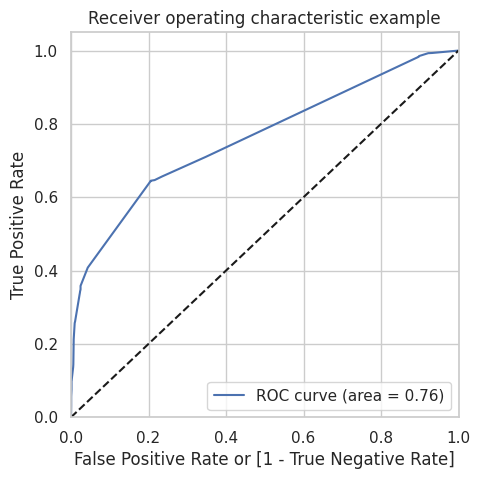

In [109]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

###The area under the curve of the ROC is 0.76 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [110]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.598502,1,1,1,1,1,1,1,0,0,0,0
1,0,0.308619,0,1,1,1,1,0,0,0,0,0,0
2,1,0.308619,0,1,1,1,1,0,0,0,0,0,0
3,1,0.326951,0,1,1,1,1,0,0,0,0,0,0
4,1,0.959985,1,1,1,1,1,1,1,1,1,1,1


In [111]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.517597  0.993020  0.075692
0.2   0.2  0.518718  0.993020  0.077855
0.3   0.3  0.526788  0.983248  0.102509
0.4   0.4  0.722484  0.644951  0.794550
0.5   0.5  0.722484  0.644951  0.794550
0.6   0.6  0.692446  0.408097  0.956747
0.7   0.7  0.673616  0.349000  0.975346
0.8   0.8  0.673616  0.349000  0.975346
0.9   0.9  0.614660  0.207538  0.993080


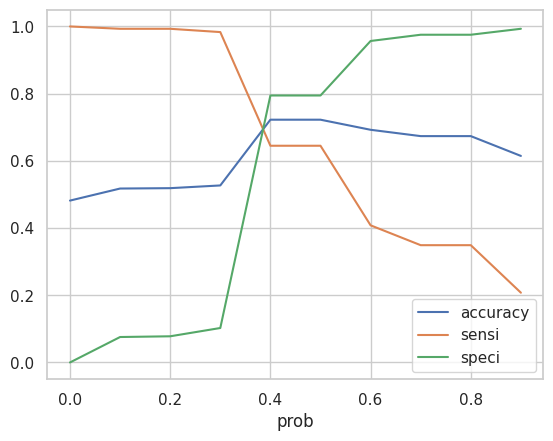

In [112]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

###As you can see that around 0.38, you get the optimal values of the three metrics. So let's choose 0.38 as our cutoff now.

In [113]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.598502,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.308619,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.308619,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.326951,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.959985,1,1,1,1,1,1,1,1,1,1,1,1


In [114]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7224837480385564

In [115]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1837,  475],
       [ 763, 1386]])

In [116]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
# Calculating the 'Sensitivity'

TP/(TP+FN)

0.6449511400651465

In [118]:
# Calculating the 'Specificity'

TN/(TN+FP)

0.7945501730103807

###This cutoff point seems good to go!

##Step 4: Making Predictions on the Test Set

###Let's now make predicitons on the test set

In [119]:
# Scaling the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [120]:
# Selecting the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()


,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,True,False,True,False,False,False,True,False,False,False,True,False,False
6122,0.027888,0.029049,False,False,False,False,False,False,False,False,False,True,False,False,False
9202,0.015936,0.416813,False,False,False,False,False,False,True,False,False,True,False,False,False
6570,0.011952,0.378961,False,False,False,False,True,False,True,False,False,True,False,False,False
2668,0.031873,0.395246,False,False,False,False,False,False,True,False,False,True,False,False,False


In [121]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [122]:
# Checking X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,True,False,True,False,False,False,True,False,False,False,True,False,False
6122,1.0,0.027888,0.029049,False,False,False,False,False,False,False,False,False,True,False,False,False
9202,1.0,0.015936,0.416813,False,False,False,False,False,False,True,False,False,True,False,False,False
6570,1.0,0.011952,0.378961,False,False,False,False,True,False,True,False,False,True,False,False,False
2668,1.0,0.031873,0.395246,False,False,False,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,False,False,False,False,False,False,True,False,False,True,False,False,False
6583,1.0,0.011952,0.152289,False,False,False,False,False,False,True,False,False,True,False,False,False
5531,1.0,0.055777,0.702025,False,False,False,False,False,False,False,False,False,True,False,False,False
3056,1.0,0.011952,0.417694,False,False,False,False,True,False,True,False,False,True,False,False,False


In [124]:
# Dropping the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife',
             'What is your current occupation_Working Professional',
                     'Last Notable Activity_Had a Phone Conversation'], axis=1,
                                inplace = True)

In [127]:
# Ensure that X_test has the same structure as X_train
# If you used one-hot encoding on X_train, you should do the same for X_test
X_test = pd.get_dummies(X_test, drop_first=True)

# Align the columns of X_test with X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Convert boolean columns to integers (if any)
X_test = X_test.astype(int)

# Add a constant to the test set
X_test_sm = sm.add_constant(X_test)

# Make predictions on the test set
y_test_pred = res.predict(X_test_sm)

# Display the predictions
print(y_test_pred[:10])

4771    0.997055
6122    0.308619
9202    0.598502
6570    0.243137
2668    0.598502
4233    0.831464
3368    0.308619
9091    0.308619
5972    0.598502
3631    0.598502
dtype: float64


In [128]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [129]:
# Let's see the head

y_pred_1.head()

,0
4771,0.997055
6122,0.308619
9202,0.598502
6570,0.243137
2668,0.598502


In [130]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [131]:
# Remove index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [132]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [133]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.997055
1,0,0.308619
2,0,0.598502
3,1,0.243137
4,1,0.598502


In [134]:
# Rename the column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [135]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.997055
1,0,0.308619
2,0,0.598502
3,1,0.243137
4,1,0.598502


In [136]:
# Make predictions on the test set using 0.38 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [137]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.997055,1
1,0,0.308619,0
2,0,0.598502,1
3,1,0.243137,0
4,1,0.598502,1


In [138]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7191422594142259

In [139]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[775, 221],
       [316, 600]])

In [140]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
# Calculating the 'sensitivity'
TP / float(TP+FN)

0.6550218340611353

In [142]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.7781124497991968

##Precision-Recall View

###Let's now also build the training model using the precision-recall view

In [143]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1837,  475],
       [ 763, 1386]])

###Precision =TP / TP + FP

In [144]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7447608812466416

###Recall =TP / TP + FN

In [145]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6449511400651465

##Precision and recall tradeoff

In [146]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    0
 4458    1
 4459    0
 4460    1
 Name: Predicted, Length: 4461, dtype: int64)

In [147]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

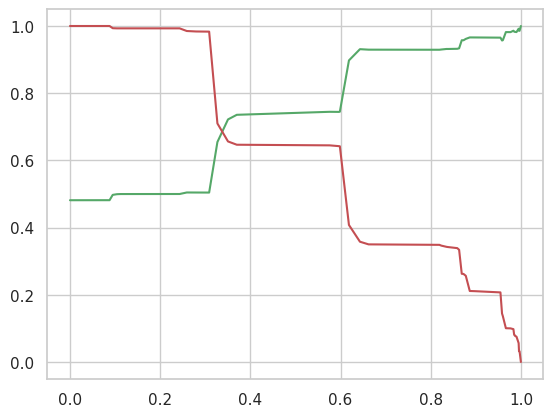

In [148]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [153]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.598502,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.308619,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.308619,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.326951,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.959985,1,1,1,1,1,1,1,1,1,1,1,1


In [154]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7128446536650975

In [155]:
# Let's creating the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1769,  543],
       [ 738, 1411]])

In [156]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

##Precision

In [157]:
TP/(TP+FP)

0.7221084953940634

##Recall

In [158]:
TP/(TP+FN)

0.6565844578873895

###This cutoff point seems good to go!

##Step 5: Making Predictions on the Test Set

###Let's now make predicitons on the test set.

In [159]:
# Making predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [160]:
y_test_pred[:10]

,0
4771,0.997055
6122,0.308619
9202,0.598502
6570,0.243137
2668,0.598502
4233,0.831464
3368,0.308619
9091,0.308619
5972,0.598502
3631,0.598502


In [161]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [162]:
# Let's see the head

y_pred_1.head()

,0
4771,0.997055
6122,0.308619
9202,0.598502
6570,0.243137
2668,0.598502


In [163]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [165]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Checking the 'y_pred_final'
y_pred_final.head()

,Converted,0
0,1,0.997055
1,0,0.308619
2,0,0.598502
3,1,0.243137
4,1,0.598502


In [166]:
# Rename the column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [167]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.997055
1,0,0.308619
2,0,0.598502
3,1,0.243137
4,1,0.598502


In [168]:
# Making predictions on the test set using 0.34 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.34 else 0)
# Checking y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.997055,1
1,0,0.308619,0
2,0,0.598502,1
3,1,0.243137,0
4,1,0.598502,1


In [169]:
# Let's checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7013598326359832

In [170]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[734, 262],
       [309, 607]])

In [171]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [172]:
# Calculating the Precision

TP/(TP+FP)

0.6985040276179517

In [173]:
# Calculating Recall

TP/(TP+FN)

0.6626637554585153